In [1]:
using Plots, CSV, DataFrames, LinearRegression, Tables
include("../saddle-point-solver.jl")

using LaTeXStrings
using Plots.PlotMeasures

plot_font = "Computer Modern"
font_size = 10
plot_dpi= 100
default(
  fontfamily=plot_font,
  tickfont = font(10, plot_font),
  legendfont = font(10, plot_font),
  guidefontsize = 11,
  guidefontfamily = plot_font,
  linewidth=1, 
  framestyle=:box, 
  label=nothing, 
  grid=false,
  dpi=plot_dpi
  )

## Generate Data

Execute the following cell to define some helper functions

In [2]:
function RSB1_SP(beta, m; maxsteps = 5000, tol = 1e-6, inits = [0., m^2, 0.9*m, 0.9], inits_p1 = [0.,m^2, 0.99*m])

    p1sol = RSB1_SP_fixM(beta, m, tol = tol, maxsteps = maxsteps, 
                init_h = inits_p1[1], init_q0 = inits_p1[2], init_q1 = inits_p1[3], 
                damping = 0.9, init_p1 = 1.,
                fix_p1 = true,
                updatestep_h = 1, damping_h = 0.25
                )

    nop1sol = RSB1_SP_fixM(beta, m, tol = tol, maxsteps = maxsteps, 
            init_h = inits[1], init_q0 = inits[2], init_q1 = inits[3], init_p1 = inits[4],
            damping = 0.9, 
            updatestep_p1 = 3, damping_p1 = 0.25, fix_p1 = false,
            updatestep_h = 1, damping_h = 0.25
            )

    (nop1sol, p1sol)            
end

function saveLine(database, type, line )
    line1 = line[1]
    line2 = line[2]
    tosave = Tuple(vcat(type, line1[1:7]..., line2[1:7]...))
    push!(database, tosave)
end

saveData(database_file, database) = CSV.write(database_file, database)

saveData (generic function with 1 method)

Execute the following cell to generate the m>=0.1 data. This will overwrite the file "m_great_0.1.csv"

In [5]:
# GENERATE DATA for m >= 0.1
database = DataFrame( type=String[], 
    beta=Float64[], h=Float64[], m=Float64[], q0=Float64[], q1=Float64[], p=Float64[], err=Float64[],
    beta_p1=Float64[], h_p1=Float64[], m_p1=Float64[], q0_p1=Float64[], q1_p1=Float64[], p_p1=Float64[], err_p1=Float64[])

firsts = [
    ((30.0, -0.6668083277474971, 0.1, 0.03706371029629181, 0.09083520801620734, 0.2535501069614147, 9.862361506849104e-7, 1.0, 1253), 
     (30.0, -0.6594369000260012, 0.1, 0.08085028165861025, 0.09799307596960538, 1.0, 9.819497529456781e-7, 1.0, 155)),
    ((22.0, -0.6831324470325109, 0.12, 0.051706457644263897, 0.10468375246546974, 0.3030026262909823, 9.973599993494405e-7, 1.0, 1082), (22.0, -0.6850961267890185, 0.12, 0.09112517837369372, 0.11489948029732874, 1.0, 9.463495415650965e-7, 1.0, 146)),
    ((22.0, -0.6919852365981283, 0.14, 0.06901603382047854, 0.12448896390150078, 0.2890706832622818, 9.929211322164113e-7, 1.0, 1085), (22.0, -0.6979149224524757, 0.14, 0.11010592990382623, 0.13529875937892613, 1.0, 9.452770953548576e-7, 1.0, 145)),
    ((22.0, -0.6946759868477425, 0.16, 0.08733030488900036, 0.1443957976625736, 0.2810342782559733, 9.926961681619859e-7, 1.0, 1082), (22.0, -0.7022451541675101, 0.16, 0.1295683737208544, 0.1554904225920696, 1.0, 9.442920447728975e-7, 1.0, 143)),
    ((22.0, -0.6924849815674465, 0.18, 0.1063528576499609, 0.16433203069930127, 0.2761094949786857, 9.921215910459211e-7, 1.0, 1085), (22.0, -0.6865405753445042, 0.18, 0.15065641195732662, 0.17501369541200076, 1.0, 9.468349577511277e-7, 1.0, 143)),
    ((22.0, -0.6861393453080884, 0.2, 0.12593388194168653, 0.18430227841592298, 0.27334217511572767, 9.835570711596924e-7, 1.0, 1160), 
     (22.0, -0.68472209148348, 0.2, 0.1697347680628501, 0.1953561306002882, 1.0, 9.877067167022813e-7, 1.0, 151)),
    ((18.0, -0.676197247714746, 0.22, 0.14436078465478636, 0.19821476117410206, 0.3122362573485699, 9.82682471776634e-7, 1.0, 1184), (18.0, -0.6767612322906909, 0.22, 0.18238762242905304, 0.21099900145011, 1.0, 9.910507391041002e-7, 1.0, 161)),
    ((17.0, -0.6631122424539326, 0.24, 0.16426217112345143, 0.21605227577651429, 0.3235572320192621, 9.880550668884302e-7, 1.0, 1181), (17.0, -0.6687546679902832, 0.24, 0.19945097423905184, 0.22961770594821057, 1.0, 9.766277610751944e-7, 1.0, 165)),
    ((16.0, -0.6471945372192316, 0.26, 0.18444310522409713, 0.23351288439538706, 0.3366632931048349, 9.80918396466632e-7, 1.0, 1205), (16.0, -0.6468703105808179, 0.26, 0.21784037348035276, 0.24669898243633293, 1.0, 9.58045510730182e-7, 1.0, 182)),
    ((16.0, -0.6286928754168355, 0.28, 0.20542164666438387, 0.2535701741786941, 0.3379816324873835, 9.919328199855416e-7, 1.0, 1196), (16.0, -0.6183959765103879, 0.28, 0.23932927143803145, 0.2654655836562722, 1.0, 9.648807162180487e-7, 1.0, 197)),
    ((18.0, -0.6077951333032963, 0.3, 0.22760118592587636, 0.2783894335597906, 0.3155193321719173, 9.865509537060941e-7, 1.0, 1361), 
     (18.0, -0.5838307042053624, 0.3, 0.26556334403374177, 0.28888072387404445, 1.0, 9.698897945619848e-7, 1.0, 191)),
    ((15.0, -0.5847071420307088, 0.32, 0.24748275042779022, 0.2906447495559562, 0.3561877230580271, 9.964278403932438e-7, 1.0, 1241), (15.0, 6.562205575795865e14, 0.32, 0.9999916869761348, 0.999993672618823, 1.0, 9.236778499823955e-7, 1.0, 110)),
    ((15.0, -0.5595615965092874, 0.34, 0.2689595614394252, 0.3107197298278247, 0.35838369349124133, 9.861640560716897e-7, 1.0, 1169), (15.0, -0.5685890749520425, 0.34, 0.29465010724639623, 0.32459880959019466, 1.0, 9.839319678542158e-7, 1.0, 185)),
    ((15.0, -0.532434331023056, 0.36, 0.290568255141878, 0.3308003791413152, 0.3607993977328129, 9.985109491454958e-7, 1.0, 1118), (15.0, -0.5477272481986433, 0.36, 0.31442428499795094, 0.34502151038096207, 1.0, 9.944218502951753e-7, 1.0, 180)),
    ((15.0, -0.5032958352280065, 0.38, 0.31245511791504615, 0.350910969304459, 0.364922988440714, 9.88319997259602e-7, 1.0, 1115), (15.0, -0.5131292920086055, 0.38, 0.3359292636698366, 0.36402837118196035, 1.0, 9.887961380336917e-7, 1.0, 190)),
    ((15.0, -0.4720674029508788, 0.4, 0.3347737708150451, 0.3710768366365082, 0.37268651817285064, 9.950827817718587e-7, 1.0, 1388), 
     (15.0, -0.4654129926877739, 0.4, 0.3588896966007758, 0.3812324747553406, 1.0, 9.718812812575134e-7, 1.0, 229)),
    ((15.0, -0.29167314900450614, 0.5, 0.4435428771399145, 0.47142843152381353, 0.37002068029898233, 9.943692443299443e-7, 1.0, 869), 
     (15.0, -0.3246907768958594, 0.5, 0.45670789674010465, 0.4852834086164986, 1.0, 9.852397671738625e-7, 1.0, 176)),
    ((15.0, -0.048698359305692156, 0.6, 0.5634941213311508, 0.5719814925424289, 0.5550890709557001, 9.950304272495579e-7, 1.0, 1703), 
     (15.0, -0.03924243829019723, 0.6, 0.5679639049592412, 0.573858501454312, 1.0, 9.99302785184468e-7, 1.0, 526)),
    ((30.0, 0.552147156085893, 0.8, 0.7794847091956468, 0.7926073446041257, 0.3367725915915422, 9.983256161771044e-7, 1.0, 794), 
     (30.0, 0.40611116490774307, 0.8, 0.7805147665755111, 0.7984739374788307, 1.0, 9.535314981712818e-7, 1.0, 193)),
]

type = "finite M"

betamin = 0.1
betamax = 31.

res = []

for first in firsts

    m = first[1][3]
    start = first[1][1]
    # first = RSB1_SP(start, m, tol = 1e-6, maxsteps = 5000)
    saveLine(database, type, first)

    inits = first[1][[2,4,5,6]]
    inits_p1 = first[2][[2,4,5]]
    for beta in start-0.1:-0.1:betamin
        new = RSB1_SP(beta, m, tol = 1e-6, maxsteps = 1000,
                inits = inits, 
                inits_p1 = inits_p1
            )
        saveLine(database, type, new)
        inits = new[1][[2,4,5,6]]
        inits_p1 = new[2][[2,4,5]]
    end

    inits = first[1][[2,4,5,6]]
    inits_p1 = first[2][[2,4,5]]    
    for beta in start+0.1:+0.1:betamax
        new = RSB1_SP(beta, m, tol = 1e-6, maxsteps = 1000,
        inits = inits, 
        inits_p1 = inits_p1
    )
    saveLine(database, type, new)
    inits = new[1][[2,4,5,6]]
    inits_p1 = new[2][[2,4,5]]

    saveData("m_great_0.1.csv", database)
    end
end

Execute the following cell to generate the m<0.1 data. This will overwrite the file "m_great_0.1.csv"

In [ ]:
# GENERATE DATA for m < 0.1
database2 = DataFrame( type=String[], 
    beta=Float64[], h=Float64[], m=Float64[], q0=Float64[], q1=Float64[], p=Float64[], err=Float64[],
    beta_p1=Float64[], h_p1=Float64[], m_p1=Float64[], q0_p1=Float64[], q1_p1=Float64[], p_p1=Float64[], err_p1=Float64[])

firsts = [
    ((10.862289575588646, -0.6494444742126302, 0.09, 0.026838081838806017, 0.030710955117328347, 0.721023696476023, 1.1437411477815855e-6, 0.0, 5000), 
     (10.862289575588646, -0.6495124005138685, 0.09, 0.02793071015992064, 0.033146762696958695, 1.0, 9.97827563992288e-7, 1.0, 1641)),
    ((11.799609803611837, -0.6349663716888327, 0.08, 0.021089584223073405, 0.02906616410768044, 0.7377090772357217, 9.946033160463769e-7, 1.0, 2792), 
     (11.799609803611837, -0.6353315691992403, 0.08, 0.023235909728182735, 0.03362814985718093, 1.0, 9.974229360563988e-7, 1.0, 665)),
    ((12.94346871309098, -0.6169280016141878, 0.07, 0.015850618538509574, 0.02732406599940055, 0.7619364096756248, 9.927289687416628e-7, 1.0, 1817), 
     (12.94346871309098, -0.6179069553263683, 0.07, 0.018689237986316273, 0.033142513515357894, 1.0, 9.92541182486715e-7, 1.0, 647)),
    ((14.380044773291308, -0.5944832441218522, 0.06, 0.01118079075671508, 0.025425507552120228, 0.7909994367151518, 9.88487736649727e-7, 1.0, 1259), 
     (14.380044773291308, -0.5964994893488629, 0.06, 0.014287722842731571, 0.03167744164643724, 1.0, 9.840972419257093e-7, 1.0, 529)),
    ((16.254955752860788, -0.5664041584936456, 0.05, 0.007179239221566968, 0.023293299938357843, 0.8256480645540989, 9.942246934415814e-7, 1.0, 1088), 
     (16.254955752860788, -0.5700106859228672, 0.05, 0.010012745444638977, 0.02920618800824146, 1.0, 9.912862796166205e-7, 1.0, 449)),
    ((18.838287068938065, -0.5307872091183174, 0.04, 0.0040057561480575515, 0.0207675907995807, 0.8660455134050247, 9.982928564034578e-7, 1.0, 783), 
     (18.838287068938065, -0.5365307604377989, 0.04, 0.005835713766375157, 0.025633053419530087, 1.0, 9.927187567631783e-7, 1.0, 455)),
    ((22.703832515811893, -0.4844269009125678, 0.03, 0.0018375886667405404, 0.017525264620945464, 0.9088389165391919, 9.874769520793792e-7, 1.0, 570), 
     (22.703832515811893, -0.4910843418611294, 0.03, 0.0023034874000891167, 0.020637546790333642, 1.0, 9.921924194966804e-7, 1.0, 460)),
    ((29.37007103663364, -0.42121831669117094, 0.02, 0.0006436657292482727, 0.0131630219712633, 0.9468762149209631, 9.986274711933184e-7, 1.0, 419), 
     (29.37007103663364, -0.4256773951911188, 0.02, 0.0006874054756084955, 0.014474594031106507, 1.0, 9.54447534694159e-7, 1.0, 305)),
    ((45.065286552076294, -0.3253312469744212, 0.01, 0.0001274235990117813, 0.007439646483160472, 0.9757764368860877, 9.749545849554843e-7, 1.0, 308), 
     (45.065286552076294, -0.3272261910669155, 0.01, 0.0001289522837250452, 0.0077329163672466, 1.0, 9.99017854001766e-7, 1.0, 248)),
    ((174.53710430825654, -0.1265291129764513, 0.001, 1.0313793234526962e-6, 0.0008765813042838011, 0.9919300905154487, 9.915349600149185e-7, 1.0, 226), 
     (174.53710430825654, -0.12684021156784062, 0.001, 1.03187402438525e-6, 0.0008836146766572209, 1.0, 9.156171722057068e-7, 1.0, 194)),
    ((92.40909152113564, -0.2008694284563817, 0.003, 9.763410752189961e-6, 0.002491071419891164, 0.9898848218896008, 9.87876338136111e-7, 1.0, 234), 
     (92.40909152113564, -0.2014416256780434, 0.003, 9.778293484903652e-6, 0.0025224523575001954, 1.0, 9.92529893287429e-7, 1.0, 200)),
    ((637.3193943417615, -0.04615323610308364, 0.0001, 1.004025175233417e-8, 9.299666697399053e-5, 0.9892949525903156, 9.650887842127633e-7, 1.0, 211), 
     (637.3193943417615, -0.04631749910734875, 0.0001, 1.0040858404692243e-8, 9.364437534841821e-5, 1.0, 9.862719409448757e-7, 1.0, 117)),
    ((2253.2643276038148, -0.01629272559842223, 1.0e-5, 1.0004820727055924e-10, 9.572568522516512e-6, 0.9853204856111057, 9.623013916690412e-7, 1.0, 215), 
     (2253.2643276038148, -0.016375760117448956, 1.0e-5, 1.0005168946061815e-10, 9.635162434462687e-6, 1.0, 9.764587339695658e-7, 1.0, 225)),
    ((7805.536596584661, -0.005635960242633294, 1.0e-6, 1.0000850168337143e-12, 9.724947023995485e-7, 0.9816458280856647, 6.398848795429335e-7, 1.0, 241), 
     (7805.536596584661, -0.005672731117196191, 1.0e-6, 1.0000692243508389e-12, 9.779854211718718e-7, 1.0, 9.211833694606367e-7, 1.0, 246)),
    ((26660.983069032958, -0.001922750542167227, 1.0e-7, 1.0000217286289803e-14, 9.815800354002511e-8, 0.9785596704357076, 9.366463307528215e-7, 1.0, 326), 
     (26660.983069032958, -0.0019376065890184878, 1.0e-7, 1.0000071003347552e-14, 9.863188601583536e-8, 1.0, 9.16632044327279e-7, 1.0, 78))
]

type = "small M"

betaintmin = 1.3
betaintmax = 8.

res = []

for first in firsts

    m = first[1][3]
    beta_scale = sqrt(log(1/m)/m)
    h_scale = sqrt(m * log(1/m))

    start = round(first[1][1] / beta_scale, digits=2)
    saveLine(database2, type, first)

    inits = first[1][[2,4,5,6]]
    inits_p1 = first[2][[2,4,5]]
    for betaint in start-0.01:-0.01:betaintmin
        new = RSB1_SP(betaint * beta_scale, m, tol = 1e-6, maxsteps = 1000,
                # inits = [-1.5 * h_scale, m^2, 0.9999 * m, 2/betaint], 
                # inits_p1 = [ (betaint^2 + 2)/(2*betaint) * h_scale , m^2, 0.9999 * m]
                inits = inits, 
                inits_p1 = inits_p1
            )
        saveLine(database2, type, new)
        inits = new[1][[2,4,5,6]]
        inits_p1 = new[2][[2,4,5]]
    end

    inits = first[1][[2,4,5,6]]
    inits_p1 = first[2][[2,4,5]]    
    for betaint in start+0.01:+0.01:betaintmax
        new = RSB1_SP(betaint * beta_scale, m, tol = 1e-6, maxsteps = 1000,
            inits = inits, 
            inits_p1 = inits_p1
        )
        saveLine(database2, type, new)
        inits = new[1][[2,4,5,6]]
        inits_p1 = new[2][[2,4,5]]
    end

    sort!(database2, [:m, :beta])
    saveData("m_less_0.1.csv", database)
end

## Process data

Read data

In [6]:
# read data
database = vcat(
    DataFrame(CSV.File("m_less_0.1.csv")), 
    DataFrame(CSV.File("m_great_0.1.csv"))
);

Compute observables and save the processed data

In [7]:
# remove spurious points
data = database[
    (database.q0 .> 0.001 * database.m.^2) .&& (database.q1 .> 0.001 * database.m.^2) .&&
    (database.q0_p1 .> 0.001 * database.m.^2) .&& (database.q1_p1 .> 0.001 * database.m.^2) .&&
    (database.q0 .< database.m) .&& (database.q1 .< database.m) .&&
    (database.q0_p1 .< database.m_p1) .&& (database.q1_p1 .< database.m_p1) .&&
    (database.err .<= 1e-5) .&& (database.err_p1 .<= 1e-5) .&& 
    (database.err .>= 1e-16) .&& (database.err_p1 .>= 1e-16), 
    :]

# compute complexity
transform!(data, [:beta_p1, :h_p1, :m_p1, :q0_p1, :q1_p1, :p_p1] => ByRow(RSB1_complexity) => :complexity_p1)

# now if complexity is definitely negative take the optimised p solution, otherwise the p=1 one
# to check the complexity, I rescale by the small m scaling for m < 0.1
data = vcat(
    data[data.m .< 0.1 .&& data.complexity_p1 ./ map( m -> m < 0.1 ? m * log(1/m) : 1. , data.m) .<= -1e-8, [:type, :beta, :h, :m, :q0, :q1, :p, :err, :complexity_p1]],
    rename!(
        data[data.m .< 0.1 .&& data.complexity_p1 ./ map( m -> m < 0.1 ? m * log(1/m) : 1. , data.m) .> -1e-8, [:type, :beta_p1, :h_p1, :m_p1, :q0_p1, :q1_p1, :p_p1, :err_p1, :complexity_p1]]
        , [:type, :beta_p1, :h_p1, :m_p1, :q0_p1, :q1_p1, :p_p1, :err_p1, :complexity_p1] .=>  [:type, :beta, :h, :m, :q0, :q1, :p, :err, :complexity_p1]
        ),
    data[data.m .>= 0.1, [:type, :beta, :h, :m, :q0, :q1, :p, :err, :complexity_p1]]
)
sort!(data, [:m, :beta])

# compute observables
transform!(data, [:beta, :h, :m, :q0, :q1, :p] => ByRow(RSB1_maxavg) => :average)
transform!(data, [:beta, :h, :m, :q0, :q1, :p] => ByRow(RSB1_replicon) => :replicon)
transform!(data, [:beta, :h, :m, :q0, :q1, :p] => ByRow(RSB1_entropy) => :entropy)
transform!(data, [:beta, :h, :m, :q0, :q1, :p] => ByRow((beta, h, m, q0, q1, p1) -> RSB1eqM(beta, h, m, q0, q1, p1) + m) => :computed_m)

CSV.write("data_processed.csv", data)
;

Compute thresholds for m < 0.1 and plot observables

In [58]:
# compute all fits for the observables at small m + the phase transitions
thresholds_small_m = []
begin
   m_beta_limits = Dict([
      1e-7 => 5,
      1e-6 => 5,
      1e-5 => 2.5,
      1e-4 => 3.5,
      0.0009 => 3,
      1e-3 => 3,
      2e-3 => 3, 
      5e-3 => 3,
      0.01 => 3,
      0.02 => 4,
      0.03 => 4,
      0.04 => 4,
      0.05 => 4,
      0.06 => 4,
      0.07 => 4,
      0.08 => 4,
      0.09 => 4,
      ])
      
   for m in filter(x -> 1e-7 <= x < 0.1, data.m |> unique |> sort) #data.m |> unique |> sort #filter(x -> x >= 0.1, data.m |> unique |> sort) #[0.001] #  #
      df = data[data.m .== m .&& data.beta / sqrt(1/m * log(1/m)) .<= m_beta_limits[m], :]
      bs = df.beta
      maxb = max(bs...)
      minb = min(bs...)
      start_fit = min(20, length(bs)-1)
      # fitted_bs = bs[end-start_fit]:maxb/15:(10*maxb)
      fitted_bs = (bs[end]+0.01):maxb/15:(3*maxb)
      inversebs = reshape(1 ./ bs[end-start_fit:end] , (length(bs[end-start_fit:end]), 1))

      #### h     
      fit_h = linregress(inversebs, df.h[end-start_fit:end], intercept = true)
      fitted_h = coef(fit_h)[1] ./ fitted_bs .+ coef(fit_h)[2]

      plot_h = plot()
      plot!(plot_h, bs/ sqrt(1/m * log(1/m)),         df.h, label = "h")
      plot!(plot_h, fitted_bs/ sqrt(1/m * log(1/m)),  fitted_h, label = "fit h")

      #### q0 
      fit_q0 = linregress(inversebs, df.q0[end-start_fit:end], intercept = true)
      fitted_q0 = coef(fit_q0)[1] ./ fitted_bs .+ coef(fit_q0)[2]

      plot_q0 = plot()
      plot!(plot_q0, bs/ sqrt(1/m * log(1/m)), df.q0 , label = "q0")
      plot!(plot_q0, fitted_bs/ sqrt(1/m * log(1/m)), fitted_q0, label = "fit q0")

      #### q1 
      fit_q1 = linregress(inversebs, df.q1[end-start_fit:end], intercept = true)
      fitted_q1 = coef(fit_q1)[1] ./ fitted_bs .+ coef(fit_q1)[2]

      plot_q1 = plot()
      plot!(plot_q1, bs/ sqrt(1/m * log(1/m)), df.q1 , label = "q1")
      plot!(plot_q1, fitted_bs/ sqrt(1/m * log(1/m)), fitted_q1, label = "fit q1")

      #### p
      fit_p = linregress(inversebs, df.p[end-start_fit:end], intercept = true)
      fitted_p = coef(fit_p)[1] ./ fitted_bs .+ coef(fit_p)[2] 

      plot_p = plot()
      plot!(plot_p, bs/ sqrt(1/m * log(1/m)),         df.p, label = "p")
      plot!(plot_p, fitted_bs/ sqrt(1/m * log(1/m)),  fitted_p, label = "fit p")

      #### submatrix average
      fit_average = linregress(inversebs, df.average[end-start_fit:end], intercept = true)
      fitted_average = coef(fit_average)[1] ./ fitted_bs .+ coef(fit_average)[2]

      plot_average = plot()
      plot!(plot_average, bs / sqrt(1/m * log(1/m)), df.average / sqrt(1/m * log(1/m)), label = "average")
      plot!(plot_average, fitted_bs / sqrt(1/m * log(1/m)), fitted_average / sqrt(1/m * log(1/m)), label = "fit average")

      #### entropy 
      fit_entropy = linregress(inversebs, df.entropy[end-start_fit:end], intercept = true)
      fitted_entropy = coef(fit_entropy)[1] ./ fitted_bs .+ coef(fit_entropy)[2]

      plot_entropy = plot()
      plot!(plot_entropy, bs / sqrt(1/m * log(1/m)), df.entropy / (m * log(1/m)), label = "entropy")
      plot!(plot_entropy, fitted_bs / sqrt(1/m * log(1/m)), fitted_entropy / (m * log(1/m)), label = "fit entropy")

      #### complexity
      plot_complexity = plot()
      plot!(plot_complexity, bs / sqrt(1/m * log(1/m)), df.complexity_p1 / m * log(1/m), label = "complexity")

      #### replicon
      fit_replicon = linregress(inversebs, df.replicon[end-start_fit:end], intercept = true)
      fitted_replicon = coef(fit_replicon)[1] ./ fitted_bs .+ coef(fit_replicon)[2]

      plot_replicon = plot()
      plot!(plot_replicon, bs/ sqrt(1/m * log(1/m)), df.replicon, label = "replicon")
      plot!(plot_replicon, fitted_bs/ sqrt(1/m * log(1/m)), fitted_replicon, label = "fit replicon")

      ### thresholds 

      # inf 
      b_inf = Inf
      a_inf = coef(fit_average)[2]

      # sat 
      i_sat = findfirst(x -> x<0, vcat(df.entropy, fitted_entropy) / (m * log(1/m)))
      b_sat = vcat(bs, fitted_bs)[i_sat]
      a_sat = vcat(df.average, fitted_average)[i_sat]
      vline!(plot_entropy, [b_sat] / sqrt(1/m * log(1/m)), label = "zero entropy")

      # stability 
      i_stab = findfirst(x -> x<0, vcat(df.replicon, fitted_replicon) )
      b_stab = vcat(bs, fitted_bs)[i_stab]
      a_stab = vcat(df.average, fitted_average)[i_stab]
      vline!(plot_replicon, [b_stab] / sqrt(1/m * log(1/m)), label = "zero replicon" )

      # static 
      i_static = findfirst(x -> x < -1e-5, df.complexity_p1 / (m * log(1/m)) )
      b_static = vcat(bs, fitted_bs)[i_static]
      a_static = vcat(df.average, fitted_average)[i_static]
      vline!(plot_complexity, [b_static] / sqrt(1/m * log(1/m)), label = "zero complexity")

      # dynamic 
      i_dynamic = findfirst(x -> x > 1e-4, df.complexity_p1 / (m * log(1/m)) ) 
      i_dynamic = isnothing(i_dynamic) ? i_static : i_dynamic 
      b_dynamic = vcat(bs, fitted_bs)[i_dynamic]
      a_dynamic = vcat(df.average, fitted_average)[i_dynamic]
      vline!(plot_complexity, [b_dynamic] / sqrt(1/m * log(1/m)), label = "jump in complexity" )

      final_plot = plot(plot_h, plot_q0, plot_q1, plot_p, plot_average, plot_entropy, plot_complexity, plot_replicon, layout = grid(4,2), size = (800, 1200), plot_title = "m = $m")

      savefig(final_plot, "plots_for_each_m/m_$m.png")
      # display(final_plot)

      push!(thresholds_small_m, 
      (m, 
         (a_dynamic, 
         a_static, 
         a_sat, 
         a_stab, 
         a_inf,
      )))

      # push!(thresholds_small_m, 
      #    (m, 
      #       (b_dynamic/ sqrt(1/m * log(1/m)), b_static/ sqrt(1/m * log(1/m)), b_sat/ sqrt(1/m * log(1/m)), b_stab/ sqrt(1/m * log(1/m)), b_inf/ sqrt(1/m * log(1/m))), 
      #       (a_dynamic/ sqrt(1/m * log(1/m)), a_static/ sqrt(1/m * log(1/m)), a_sat/ sqrt(1/m * log(1/m)), a_stab/ sqrt(1/m * log(1/m)), a_inf/ sqrt(1/m * log(1/m))),
      #    ))
   end

end

Compute thresholds for m >= 0.1 and plot observables

In [70]:
# compute all fits for the observables at finite m + the phase transitions
thresholds_finite_m = []
begin
   m_beta_limits = Dict([
    0.1 => 28, 
    0.12 => 27,
    0.14 => 27,
    0.16 => 27,
    0.18 => 27,
    0.2 => 25, 
    0.22 => 23,
    0.24 => 20,
    0.26 => 20,
    0.28 => 20,
    0.3 => 20, 
    0.32 => 20,
    0.34 => 20,
    0.36 => 20,
    0.38 => 20,
    0.4 => 20, 
    0.5 => 20, 
    0.6 => 18, 
    0.8 => 50
    ])
      
   for m in filter(x -> 0.1 <= x, data.m |> unique |> sort) 
      df = data[data.m .== m .&& data.beta  .<= m_beta_limits[m], :]
      bs = df.beta
      maxb = max(bs...)
      minb = min(bs...)
      start_fit = min(20, length(bs)-1)
      # fitted_bs = bs[end-start_fit]:maxb/15:(10*maxb)
      fitted_bs = (bs[end]+0.01):maxb/15:(10*maxb)
      inversebs = reshape(1 ./ bs[end-start_fit:end] , (length(bs[end-start_fit:end]), 1))

      #### h     
      fit_h = linregress(inversebs, df.h[end-start_fit:end], intercept = true)
      fitted_h = coef(fit_h)[1] ./ fitted_bs .+ coef(fit_h)[2]

      plot_h = plot()
      plot!(plot_h, bs/ sqrt(1/m * log(1/m)),         df.h, label = "h")
      plot!(plot_h, fitted_bs/ sqrt(1/m * log(1/m)),  fitted_h, label = "fit h")

      #### q0 
      fit_q0 = linregress(inversebs, df.q0[end-start_fit:end], intercept = true)
      fitted_q0 = coef(fit_q0)[1] ./ fitted_bs .+ coef(fit_q0)[2]

      plot_q0 = plot()
      plot!(plot_q0, bs/ sqrt(1/m * log(1/m)), df.q0 , label = "q0")
      plot!(plot_q0, fitted_bs/ sqrt(1/m * log(1/m)), fitted_q0, label = "fit q0")

      #### q1 
      fit_q1 = linregress(inversebs, df.q1[end-start_fit:end], intercept = true)
      fitted_q1 = coef(fit_q1)[1] ./ fitted_bs .+ coef(fit_q1)[2]

      plot_q1 = plot()
      plot!(plot_q1, bs/ sqrt(1/m * log(1/m)), df.q1 , label = "q1")
      plot!(plot_q1, fitted_bs/ sqrt(1/m * log(1/m)), fitted_q1, label = "fit q1")

      #### p
      fit_p = linregress(inversebs, df.p[end-start_fit:end], intercept = true)
      fitted_p = coef(fit_p)[1] ./ fitted_bs .+ coef(fit_p)[2] 

      plot_p = plot()
      plot!(plot_p, bs,         df.p, label = "p")
      plot!(plot_p, fitted_bs,  fitted_p, label = "fit p")

      #### submatrix average
      fit_average = linregress(inversebs, df.average[end-start_fit:end], intercept = true)
      fitted_average = coef(fit_average)[1] ./ fitted_bs .+ coef(fit_average)[2]

      plot_average = plot()
      plot!(plot_average, bs , df.average , label = "average")
      plot!(plot_average, fitted_bs , fitted_average , label = "fit average")

      #### entropy 
      fit_entropy = linregress(inversebs, df.entropy[end-start_fit:end], intercept = true)
      fitted_entropy = coef(fit_entropy)[1] ./ fitted_bs .+ coef(fit_entropy)[2]

      plot_entropy = plot()
      plot!(plot_entropy, bs , df.entropy , label = "entropy")
      plot!(plot_entropy, fitted_bs , fitted_entropy , label = "fit entropy")

      #### complexity
      plot_complexity = plot()
      plot!(plot_complexity, bs, df.complexity_p1 , label = "complexity")

      #### replicon
      fit_replicon = linregress(inversebs, df.replicon[end-start_fit:end], intercept = true)
      fitted_replicon = coef(fit_replicon)[1] ./ fitted_bs .+ coef(fit_replicon)[2]

      replicons = vcat(df.replicon, fitted_replicon)
      plot_replicon = plot(ylim=(min(replicons...), -min(replicons...)), xlim = (0, 30))
      plot!(plot_replicon, bs, df.replicon, label = "replicon")
      plot!(plot_replicon, fitted_bs, fitted_replicon, label = "fit replicon")

      ### thresholds 

      # inf 
      b_inf = Inf
      a_inf = coef(fit_average)[2]

      # sat 
      i_sat = findfirst(x -> x< 0, vcat(df.entropy, fitted_entropy)) 
      b_sat = vcat(bs, fitted_bs)[i_sat]
      a_sat = vcat(df.average, fitted_average)[i_sat]
      vline!(plot_entropy, [b_sat], label = "zero entropy")

      # stability 
      i_stab = findfirst(x -> x< 2e-5, vcat(df.replicon, fitted_replicon) ) - 1
      b_stab = vcat(bs, fitted_bs)[i_stab]
      a_stab = vcat(df.average, fitted_average)[i_stab]
      vline!(plot_replicon, [b_stab] , label = "zero replicon" )

      # static 
      # i_static = findfirst(x -> x < -1e-5, df.complexity_p1 )
      # b_static = vcat(bs, fitted_bs)[i_static]
      # a_static = vcat(df.average, fitted_average)[i_static]
      # vline!(plot_complexity, [b_static] , label = "zero complexity")

      # # dynamic 
      # i_dynamic = findfirst(x -> x > 1e-4, df.complexity_p1  )
      # i_dynamic = isnothing(i_dynamic) ? i_static : i_dynamic
      # b_dynamic = vcat(bs, fitted_bs)[i_dynamic]
      # a_dynamic = vcat(df.average, fitted_average)[i_dynamic]
      # vline!(plot_complexity, [b_dynamic] , label = "jump in complexity" )

      final_plot = plot(plot_h, plot_q0, plot_q1, plot_p, plot_average, plot_entropy, plot_complexity, plot_replicon, layout = grid(4,2), size = (800, 1200), plot_title = "m = $m")

      savefig(final_plot, "plots_for_each_m/m_$m.png")
      # display(final_plot)

      push!(thresholds_finite_m, 
      (m, 
         (NaN, 
         NaN, #m == 0.1 ? a_static : NaN, 
         a_sat, 
         a_stab, 
         a_inf,
      )))

      # push!(thresholds_small_m, 
      #    (m, 
      #       (b_dynamic/ sqrt(1/m * log(1/m)), b_static/ sqrt(1/m * log(1/m)), b_sat/ sqrt(1/m * log(1/m)), b_stab/ sqrt(1/m * log(1/m)), b_inf/ sqrt(1/m * log(1/m))), 
      #       (a_dynamic/ sqrt(1/m * log(1/m)), a_static/ sqrt(1/m * log(1/m)), a_sat/ sqrt(1/m * log(1/m)), a_stab/ sqrt(1/m * log(1/m)), a_inf/ sqrt(1/m * log(1/m))),
      #    ))
   end

end

tidy up and save thresholds

In [71]:
# merge together the phase transition thresholds and save them
thresholds = vcat(thresholds_small_m, thresholds_finite_m, (0.999, (NaN, NaN, 0., 0., 0.)))
thresholds = map(thresholds) do line
    [line[1], line[2]...]
end
thresholds = hcat(thresholds...)'
CSV.write("thresholds.csv", Tables.table(thresholds), header = ["m", "a Dynamic", "a Static", "a Zero entropy", "a Zero replicon", "a Beta infinity"])

"thresholds.csv"

## Plots for main text

### Phase diagram unscaled

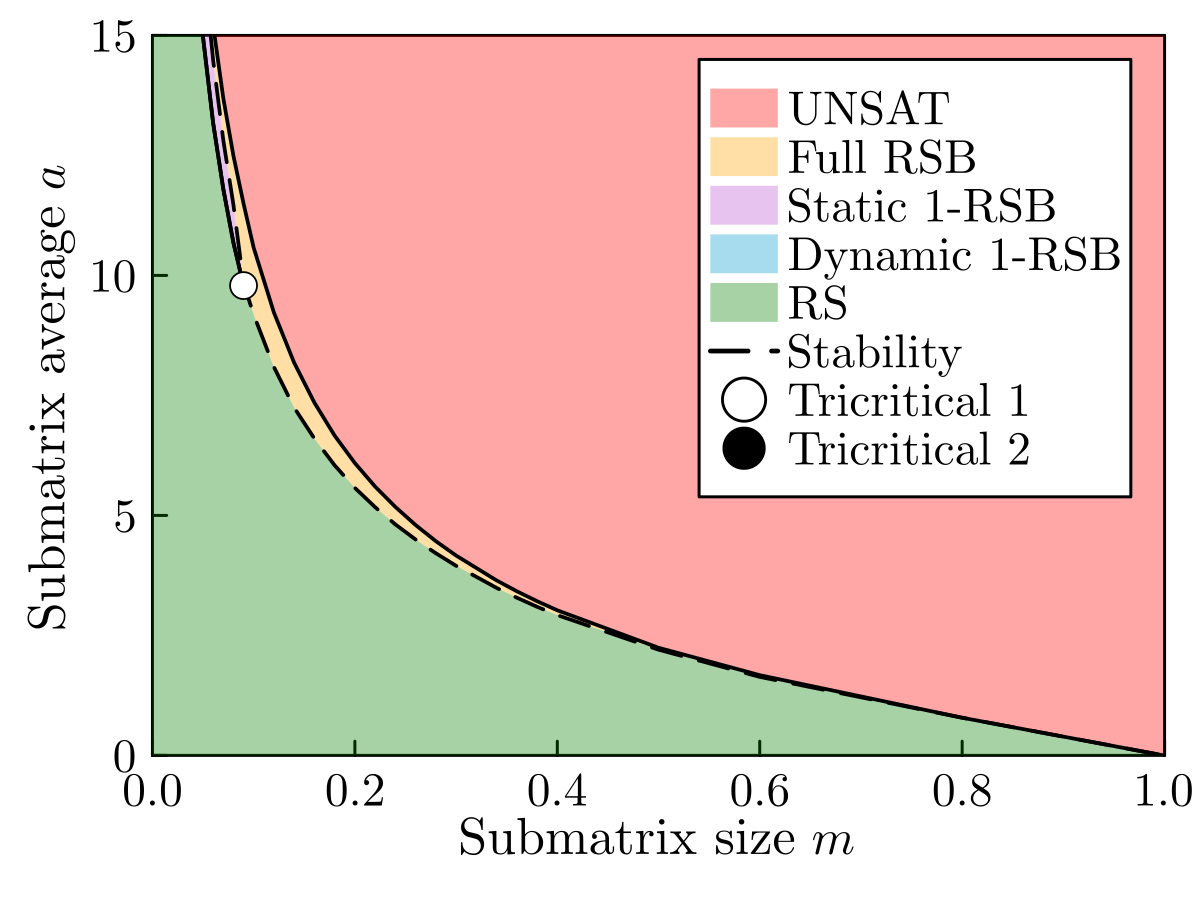

In [72]:
begin
    thresholds = CSV.read("thresholds.csv", DataFrame)
    thresholds = Matrix(thresholds)

    miny = 0.
    maxy = 15.

    p = plot(size = (400,300), 
        dpi = 300,
        xscale = :linear, legend = :topright, xticks = [0.,0.2, 0.4, 0.6, 0.8, 1.], ylim = (miny, maxy), xlim=(0., 1.), 
        xlabel = L"Submatrix size $m$", ylabel = L"Submatrix average $a$", 
        )
    ms = thresholds[:, 1]
    scaling = sqrt.(1 ./ ms .* log.(1 ./ ms))

    dyn = thresholds[:, 2] 
    stat = thresholds[:, 3]
    last = thresholds[:, 4]
    stab = thresholds[:, 5]

    stab = map((x,y) -> x>y ? y : x, stab, last)
    dyn = map((x,y) -> isnan(x) ? y : x, dyn, stab)
    stat = map((x,y) -> isnan(x) ? y : x, stat, stab)

    plot!(p, ms, ones(length(ms)) * maxy, 
            fillrange = last, fillalpha = 0.35, c = :red, alpha = 0., label = "UNSAT")
    plot!(p, ms, last, 
        fillrange = stab, fillalpha = 0.35, c = :orange, alpha = 0., label = "Full RSB")
    plot!(p, ms, stab, 
        fillrange = stat, fillalpha = 0.35, c = :mediumorchid, alpha = 0., label = "Static 1-RSB")
    plot!(p, ms, stat, 
        fillrange = dyn, fillalpha = 0.35, c = :deepskyblue3, alpha = 0., label = "Dynamic 1-RSB")
    plot!(p, ms, dyn, 
        fillrange = ones(length(ms)) * miny, fillalpha = 0.35, c = :green, alpha = 0., label = "RS")

    dyn = thresholds[:, 2]  
    stat = thresholds[:, 3] 
    last = thresholds[:, 4] 
    stab = thresholds[:, 5] 
    stab = map((x,y) -> x>y ? y : x, stab, last)

    plot!(p, ms, dyn, color = :black,  lw = 1.25, label  = :none)
    plot!(p, ms, stat, color = :black, lw = 1.25, label = :none)
    plot!(p, ms, last, color = :black, lw = 1.25, label =  :none)
    plot!(p, ms, stab, color = :black, lw = 1.25, label = "Stability", ls = :dash)

    scatter!(p, [0.09], thresholds[thresholds[:, 1] .== 0.09, 2], color = :white, label = "Tricritical 1", markersize = 5)
    scatter!(p, [1e-4], [30.1], color = :black, label = "Tricritical 2", markersize = 5)

    savefig(p, "plots_paper/ph.png")
    display(p)
end

### Phase diagram scaled

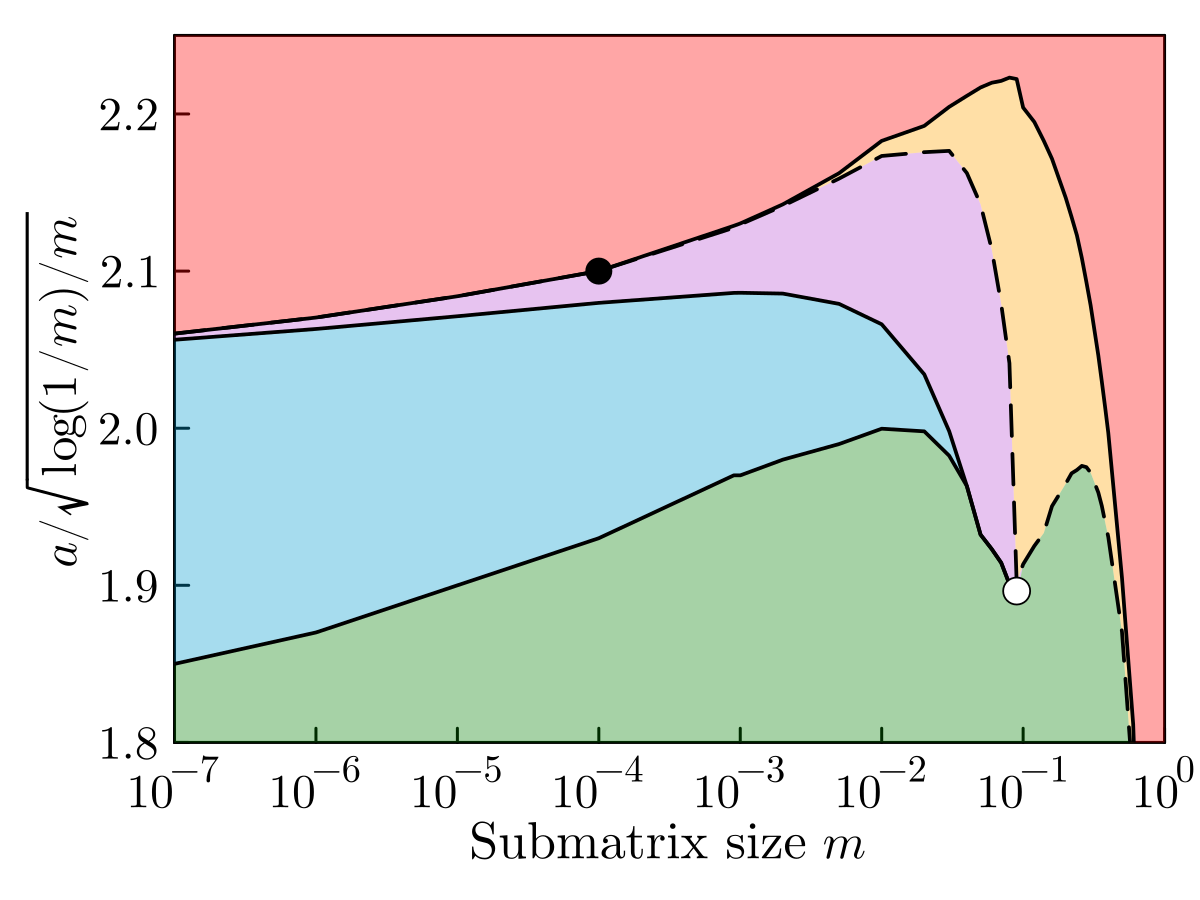

In [79]:
begin
    thresholds = CSV.read("thresholds.csv", DataFrame)
    thresholds = Matrix(thresholds)

    miny = 1.8
    maxy = 2.25

    p = plot(size = (400,300), dpi = 300, xscale = :log10, legend = :none, xticks = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1,1], ylim = (miny, maxy), xlim=(1e-7, 1.),
    xlabel = L"Submatrix size $m$", ylabel = L"$a / \sqrt{\log(1/m) / m}$", 
    )
    ms = thresholds[:, 1]
    scaling = sqrt.(1 ./ ms .* log.(1 ./ ms))

    dyn = thresholds[:, 2] ./ scaling
    stat = thresholds[:, 3] ./ scaling
    last = thresholds[:, 4] ./ scaling
    stab = thresholds[:, 5] ./ scaling

    stab = map((x,y) -> x>y ? y : x, stab, last)
    dyn = map((x,y) -> isnan(x) ? y : x, dyn, stab)
    stat = map((x,y) -> isnan(x) ? y : x, stat, stab)

    plot!(p, ms, ones(length(ms)) * maxy, 
            fillrange = last, fillalpha = 0.35, c = :red, alpha = 0., label = "UNSAT")
    plot!(p, ms, last, 
        fillrange = stab, fillalpha = 0.35, c = :orange, alpha = 0., label = "Full RSB")
    plot!(p, ms, stab, 
        fillrange = stat, fillalpha = 0.35, c = :mediumorchid, alpha = 0., label = "Static 1-RSB")
    plot!(p, ms, stat, 
        fillrange = dyn, fillalpha = 0.35, c = :deepskyblue3, alpha = 0., label = "Dynamic 1-RSB")
    plot!(p, ms, dyn, 
        fillrange = ones(length(ms)) * miny, fillalpha = 0.35, c = :green, alpha = 0., label = "RS")

    dyn = thresholds[:, 2] ./ scaling
    stat = thresholds[:, 3] ./ scaling
    last = thresholds[:, 4] ./ scaling
    stab = thresholds[:, 5] ./ scaling
    stab = map((x,y) -> x>y ? y : x, stab, last)

    plot!(p, ms, dyn, color = :black,  lw = 1.25, label  = :none)
    plot!(p, ms, stat, color = :black, lw = 1.25, label = :none)
    plot!(p, ms, last, color = :black, lw = 1.25, label =  :none)
    plot!(p, ms, stab, color = :black, lw = 1.25, label = "dAT stability", ls = :dash)

    scatter!(p, [0.09], thresholds[thresholds[:, 1] .== 0.09, 2] / scaling[thresholds[:, 1] .== 0.09] .+ 0.004, color = :white, label = :none, markersize = 5)
    scatter!(p, [1e-4], [2.1], color = :black, label = :none, markersize = 5)
    # println(2.1 * sqrt(1e4 * log(1e4)))

    # vline!([0.1])

    savefig(p, "plots_paper/ph_zoom.png")
    display(p)
end

### Entropy vs beta

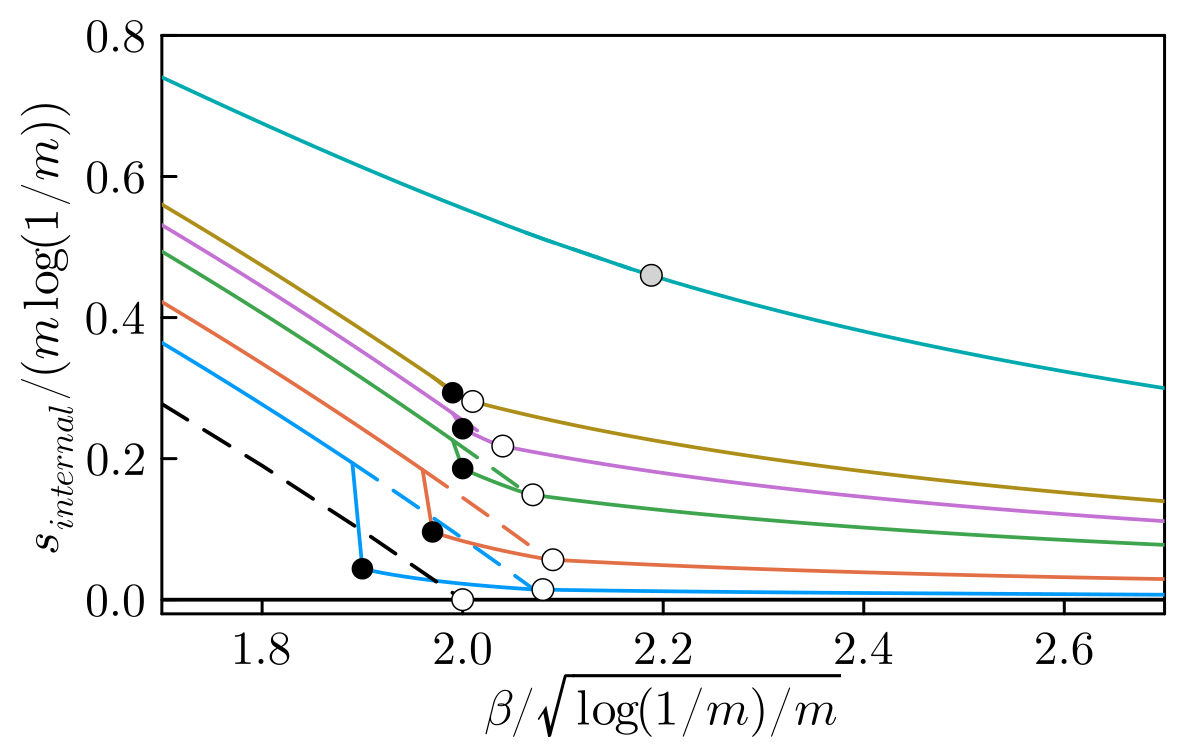

In [83]:
# compute all fits for the observables at small m + the phase transitions
thresholds_small_m = []
begin
   data = CSV.read("data_processed.csv", DataFrame)
   thresholds = CSV.read("thresholds.csv", DataFrame)
   thresholds = Matrix(thresholds)
   dyn = thresholds[:, 2]   
   stat = thresholds[:, 3] 
    last = thresholds[:, 4] 
    stab = thresholds[:, 5] 
   stab = map((x,y) -> x>y ? y : x, stab, last)
   dyn = map((x,y) -> isnan(x) ? y : x, dyn, stab)
   stat = map((x,y) -> isnan(x) ? y : x, stat, stab)

   m_beta_limits = Dict([
      1e-7 => 5,
      1e-6 => 5,
      1e-5 => 2.5,
      1e-4 => 3.5,
      0.0009 => 3,
      1e-3 => 3,
      2e-3 => 3, 
      5e-3 => 3,
      0.01 => 3,
      0.02 => 4,
      0.03 => 4,
      0.04 => 4,
      0.05 => 4,
      0.06 => 4,
      0.07 => 4,
      0.08 => 4,
      0.09 => 4,
      0.1 => 10
      ])
      
   p = plot(size = (400,250), dpi = 300, xlim = (1.7, 2.7), ylim = (-0.02, 0.8),
      legendtitle = L"$m = $", legend = :none, legendfont = 9, legend_columns = 1,
      xlabel = L"$\beta / \sqrt{\log(1/m)/m}$", ylabel = L"$s_{\rm internal} / (m \, \log(1/m))$", 
   )

   dynamic = []
   static = []
   stability = []

   for (i,m) in enumerate([1e-5, 1e-3, 0.01, 0.02, 0.03, 0.1])
      df = data[data.m .== m .&& data.beta / sqrt(1/m * log(1/m)) .<= m_beta_limits[m], :]
      bs = df.beta
      maxb = max(bs...)
      minb = min(bs...)
      start_fit = min(20, length(bs)-1)
      fitted_bs = (bs[end]+0.01):maxb/15:(100*maxb)
      inversebs = reshape(1 ./ bs[end-start_fit:end] , (length(bs[end-start_fit:end]), 1))

      betas = vcat(bs, fitted_bs) / sqrt(1/m * log(1/m))

      #### submatrix average
      fit_average = linregress(inversebs, df.average[end-start_fit:end], intercept = true)
      fitted_average = coef(fit_average)[1] ./ fitted_bs .+ coef(fit_average)[2]
      average = vcat(df.average, fitted_average) / sqrt(1/m * log(1/m))

      #### entropy 
      fit_entropy = linregress(inversebs, df.entropy[end-start_fit:end], intercept = true)
      fitted_entropy = coef(fit_entropy)[1] ./ fitted_bs .+ coef(fit_entropy)[2]
      tot_entropy = map(vcat(df.entropy, fitted_entropy) / (m * log(1/m))) do x
         x >= 0. ? x : NaN
      end

      ### internal entropy
      complexity = map(vcat(df.complexity_p1  / (m * log(1/m)), repeat([0], length(tot_entropy) - length(df.complexity_p1)))) do x
         x >= 0. ? x : 0.
      end
      int_entropy = tot_entropy - complexity  
      tot_entropy_2 = map(tot_entropy, complexity) do e, c
         c > 1e-8 ? e : NaN
      end  

      k = findlast(x -> x > 1e-8, complexity)
      j = findfirst(x -> x > 1e-8, complexity)

      plot!(p, betas, int_entropy, label = m, color = i, lw = 1.25)
      if !isnothing(k) && !isnothing(j)
         plot!(p, betas[j-1:k+1], tot_entropy[j-1:k+1], label = :none, color = i, ls = :dash, lw = 1.25)
      end

      th_dyn = dyn[thresholds[:, 1] .== m][1] / sqrt(1/m * log(1/m)) 
      th_static = stat[thresholds[:, 1] .== m][1] / sqrt(1/m * log(1/m)) 
      th_stability = stab[thresholds[:, 1] .== m][1] / sqrt(1/m * log(1/m)) 

      
      # println(findfirst(x -> abs(x - a_dyn) < 1e-4,  average))
      l_dyn = findfirst(average .== th_dyn) 
      l_stat = findfirst(average .== th_static)
      l_stability = findfirst(average .== th_stability)


      b_dyn = betas[l_dyn] 
      s_dyn = int_entropy[l_dyn] 
      b_static = betas[l_stat]
      s_static = int_entropy[l_stat]
      b_stability = betas[l_stability]
      s_stability = int_entropy[l_stability]

      push!(dynamic, [b_dyn, s_dyn])
      push!(static, [b_static, s_static])
      push!(stability, [b_stability, s_stability])

   end

  

   bs= 1:0.1:2
   plot!(p, bs, 1 .- bs .^2 ./ 4    , color = :black, label = :none, ls = :dash, lw = 1.25)
   bs= 1:0.1:4
   plot!(p, bs, map(x->0, bs)   , color = :black, label = L"$m \to 0$", ls = :solid, lw = 1.25)

   scatter!(p, getindex.(getindex.(dynamic, 1),1)[1:end-1], getindex.(getindex.(dynamic, 2),1)[1:end-1], label = "Dynamic", color = :black)
   scatter!(p, getindex.(getindex.(static, 1),1)[1:end-1], getindex.(getindex.(static, 2),1)[1:end-1],   label = "Static", color = :white)
   scatter!(p, getindex.(getindex.(stability, 1),1)[1:end], getindex.(getindex.(dynamic, 2),1)[1:end],   label = "Stability", color = :lightgrey)
   scatter!(p, [2], [0], color = :white)

   # println(stability)

   # hline!([0.], ls = :dot, color = :grey)

   savefig(p, "plots_paper/internal_entropy_vs_beta.png")
   display(p)
end

### Average vs beta

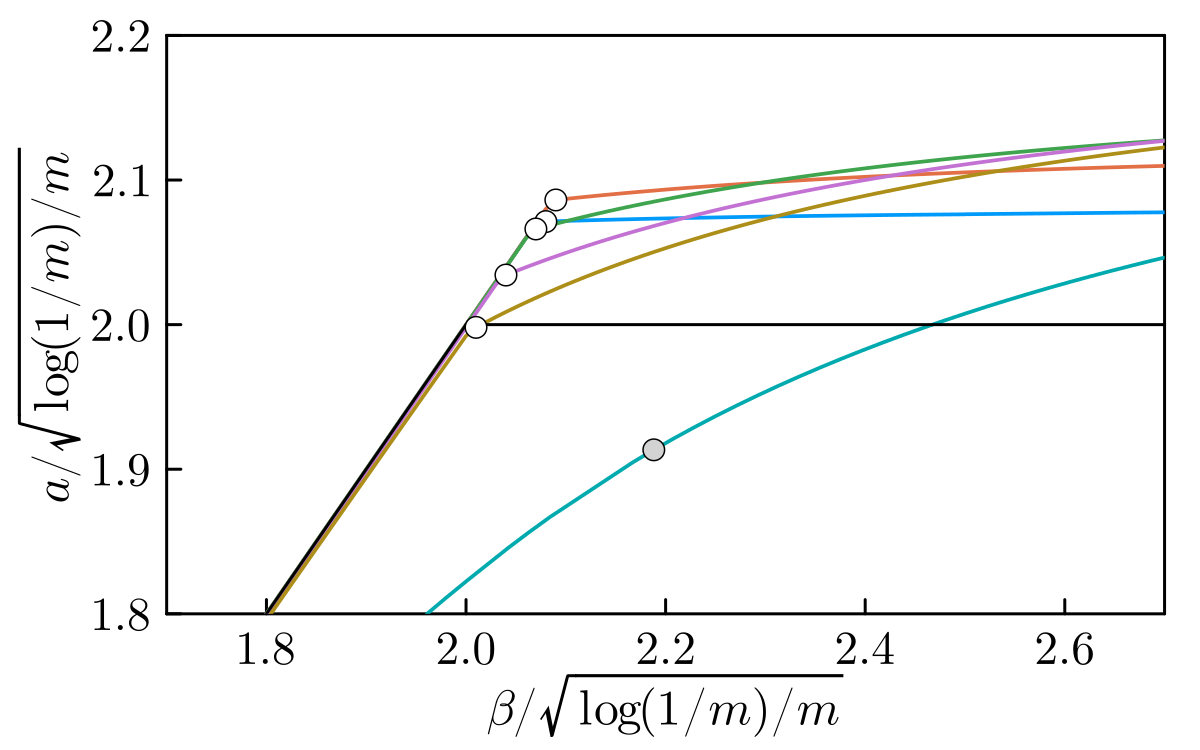

In [77]:
# compute all fits for the observables at small m + the phase transitions
thresholds_small_m = []
begin
   data = CSV.read("data_processed.csv", DataFrame)
   thresholds = CSV.read("thresholds.csv", DataFrame)
   thresholds = Matrix(thresholds)
   dyn = thresholds[:, 2]   
   stat = thresholds[:, 3] 
    last = thresholds[:, 4] 
    stab = thresholds[:, 5] 
   stab = map((x,y) -> x>y ? y : x, stab, last)
   dyn = map((x,y) -> isnan(x) ? y : x, dyn, stab)
   stat = map((x,y) -> isnan(x) ? y : x, stat, stab)

   m_beta_limits = Dict([
      1e-7 => 5,
      1e-6 => 5,
      1e-5 => 2.5,
      1e-4 => 3.5,
      0.0009 => 3,
      1e-3 => 3,
      2e-3 => 3, 
      5e-3 => 3,
      0.01 => 3,
      0.02 => 4,
      0.03 => 4,
      0.04 => 4,
      0.05 => 4,
      0.06 => 4,
      0.07 => 4,
      0.08 => 4,
      0.09 => 4,
      0.1 => 10
      ])
      
   p = plot(size = (400,250), dpi = 300, xlim = (1.7, 2.7), ylim = (1.8, 2.2),
      legendtitle = L"$m = $", legend = :none, legendfont = 9, legend_columns = 1,
      xlabel = L"$\beta / \sqrt{\log(1/m)/m}$", ylabel = L"$a  / \sqrt{\log(1/m)/m}$", 
   )

   dynamic = []
   static = []
   stability = []

   for (i,m) in enumerate([1e-5, 1e-3, 0.01, 0.02, 0.03, 0.1])
      df = data[data.m .== m .&& data.beta / sqrt(1/m * log(1/m)) .<= m_beta_limits[m], :]
      bs = df.beta
      maxb = max(bs...)
      minb = min(bs...)
      start_fit = min(20, length(bs)-1)
      fitted_bs = (bs[end]+0.01):maxb/15:(100*maxb)
      inversebs = reshape(1 ./ bs[end-start_fit:end] , (length(bs[end-start_fit:end]), 1))

      betas = vcat(bs, fitted_bs) / sqrt(1/m * log(1/m))

      #### submatrix average
      fit_average = linregress(inversebs, df.average[end-start_fit:end], intercept = true)
      fitted_average = coef(fit_average)[1] ./ fitted_bs .+ coef(fit_average)[2]
      average = vcat(df.average, fitted_average) / sqrt(1/m * log(1/m))

      #### entropy 
      fit_entropy = linregress(inversebs, df.entropy[end-start_fit:end], intercept = true)
      fitted_entropy = coef(fit_entropy)[1] ./ fitted_bs .+ coef(fit_entropy)[2]
      tot_entropy = map(vcat(df.entropy, fitted_entropy) / (m * log(1/m))) do x
         x >= 0. ? x : NaN
      end

      ### internal entropy
      complexity = map(vcat(df.complexity_p1  / (m * log(1/m)), repeat([0], length(tot_entropy) - length(df.complexity_p1)))) do x
         x >= 0. ? x : 0.
      end
      int_entropy = tot_entropy - complexity  
      tot_entropy_2 = map(tot_entropy, complexity) do e, c
         c > 1e-8 ? e : NaN
      end  

      k = findlast(x -> x > 1e-8, complexity)
      j = findfirst(x -> x > 1e-8, complexity)

      plot!(p, betas, average, label = m, color = i, lw = 1.25)
      # if !isnothing(k) && !isnothing(j)
      #    plot!(p, betas[j-1:k+1], tot_entropy[j-1:k+1], label = :none, color = i, ls = :dash, lw = 1.25)
      # end

      th_dyn = dyn[thresholds[:, 1] .== m][1] / sqrt(1/m * log(1/m)) 
      th_static = stat[thresholds[:, 1] .== m][1] / sqrt(1/m * log(1/m)) 
      th_stability = stab[thresholds[:, 1] .== m][1] / sqrt(1/m * log(1/m)) 

      
      # println(findfirst(x -> abs(x - a_dyn) < 1e-4,  average))
      l_dyn = findfirst(average .== th_dyn) 
      l_stat = findfirst(average .== th_static)
      l_stability = findfirst(average .== th_stability)


      b_dyn = betas[l_dyn] 
      s_dyn = average[l_dyn] 
      b_static = betas[l_stat]
      s_static = average[l_stat]
      b_stability = betas[l_stability]
      s_stability = average[l_stability]

      push!(dynamic, [b_dyn, s_dyn])
      push!(static, [b_static, s_static])
      push!(stability, [b_stability, s_stability])

   end

  

   bs= 1:0.1:2
   plot!(p, bs, bs    , color = :black, label = :none, ls = :solid)
   bs= 2:0.1:4
   plot!(p, bs, map(x -> 2, bs)   , color = :black, label = L"$m \to 0$", ls = :solid)

   # scatter!(p, getindex.(getindex.(dynamic, 1),1)[1:end-1], getindex.(getindex.(dynamic, 2),1)[1:end-1], label = "Dynamic", color = :black)
   scatter!(p, getindex.(getindex.(static, 1),1)[1:end-1], getindex.(getindex.(static, 2),1)[1:end-1],   label = "Static", color = :white)
   scatter!(p, getindex.(getindex.(stability, 1),1)[1:end], getindex.(getindex.(dynamic, 2),1)[1:end],   label = "Stability", color = :lightgrey)
   # scatter!(p, [2], [0], color = :white)

   hline!([0.], ls = :dot, color = :grey)

   savefig(p, "plots_paper/average_vs_beta.png")
   display(p)
end

### Entropies as a function of submatrix average for various m

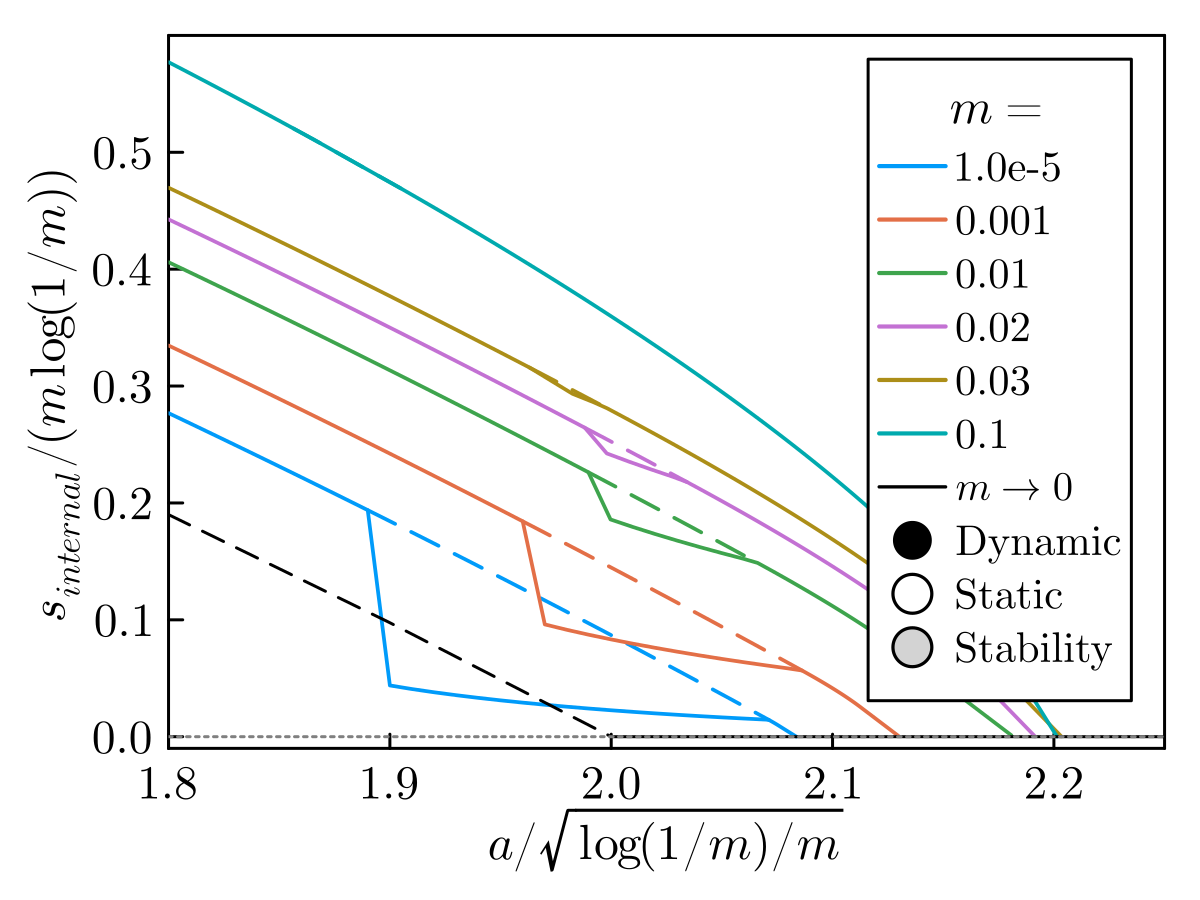

In [74]:
# compute all fits for the observables at small m + the phase transitions
thresholds_small_m = []
begin
   data = CSV.read("data_processed.csv", DataFrame)
   thresholds = CSV.read("thresholds.csv", DataFrame)
   thresholds = Matrix(thresholds)
   stab = map((x,y) -> x>y ? y : x, stab, last)
   dyn = map((x,y) -> isnan(x) ? y : x, dyn, stab)
   stat = map((x,y) -> isnan(x) ? y : x, stat, stab)

   m_beta_limits = Dict([
      1e-7 => 5,
      1e-6 => 5,
      1e-5 => 2.5,
      1e-4 => 3.5,
      0.0009 => 3,
      1e-3 => 3,
      2e-3 => 3, 
      5e-3 => 3,
      0.01 => 3,
      0.02 => 4,
      0.03 => 4,
      0.04 => 4,
      0.05 => 4,
      0.06 => 4,
      0.07 => 4,
      0.08 => 4,
      0.09 => 4, 
      0.1 => 10,
      ])
      
   p = plot(size = (400,300), dpi = 300, xlim = (1.8, 2.25), ylim = (-0.01,0.6),
      legendtitle = L"$m = $", legend = :topright, legendfont = 9, legend_columns = 1,
      xlabel = L"$a / \sqrt{\log(1/m)/m}$", ylabel = L"$s_{\rm internal} / (m \, \log(1/m))$", 
   )

   dynamic = []
   static = []

   for (i,m) in enumerate([1e-5, 1e-3, 0.01, 0.02, 0.03, 0.1])
      df = data[data.m .== m .&& data.beta / sqrt(1/m * log(1/m)) .<= m_beta_limits[m], :]
      bs = df.beta
      maxb = max(bs...)
      minb = min(bs...)
      start_fit = min(20, length(bs)-1)
      fitted_bs = (bs[end]+0.01):maxb/15:(3*maxb)
      inversebs = reshape(1 ./ bs[end-start_fit:end] , (length(bs[end-start_fit:end]), 1))

      #### submatrix average
      fit_average = linregress(inversebs, df.average[end-start_fit:end], intercept = true)
      fitted_average = coef(fit_average)[1] ./ fitted_bs .+ coef(fit_average)[2]
      average = vcat(df.average, fitted_average) / sqrt(1/m * log(1/m))

      #### entropy 
      fit_entropy = linregress(inversebs, df.entropy[end-start_fit:end], intercept = true)
      fitted_entropy = coef(fit_entropy)[1] ./ fitted_bs .+ coef(fit_entropy)[2]
      tot_entropy = map(vcat(df.entropy, fitted_entropy) / (m * log(1/m))) do x
         x >= 0. ? x : NaN
      end

      ### internal entropy
      complexity = map(vcat(df.complexity_p1  / (m * log(1/m)), repeat([0], length(tot_entropy) - length(df.complexity_p1)))) do x
         x >= 0. ? x : 0.
      end
      int_entropy = tot_entropy - complexity  
      tot_entropy_2 = map(tot_entropy, complexity) do e, c
         c > 1e-8 ? e : NaN
      end  

      k = findlast(x -> x > 1e-8, complexity)
      j = findfirst(x -> x > 1e-8, complexity)

      plot!(p, average, int_entropy, label = m, color = i, lw = 1.25)
      if !isnothing(k) && !isnothing(j)
         plot!(p, average[j-1:k+1], tot_entropy[j-1:k+1], label = :none, color = i, ls = :dash, lw = 1.25)
      end

      th_dyn = dyn[thresholds[:, 1] .== m] / sqrt(1/m * log(1/m)) 
      th_static = stat[thresholds[:, 1] .== m] / sqrt(1/m * log(1/m)) 
      th_stability = stab[thresholds[:, 1] .== m] / sqrt(1/m * log(1/m)) 
      
      # println(findfirst(x -> abs(x - a_dyn) < 1e-4,  average))
      l = findfirst(average .== th_dyn) 

      if isnothing(l)
         a_dyn = NaN
         s_dyn = NaN
         a_static = NaN
         s_static = NaN
      else
         a_dyn = average[l] 
         s_dyn = int_entropy[l] 
         a_static = average[average .== th_static]
         s_static = int_entropy[average .== th_static]
      end

      push!(dynamic, [a_dyn, s_dyn])
      push!(static, [a_static, s_static])

   end

   bs= 1:0.1:2
   plot!(p, bs, max.(1 .- bs .^2 ./ 4, 0.)    , color = :black, label = :none, ls = :dash)
   bs= 2:0.1:4
   plot!(p, bs, max.(1 .- bs .^2 ./ 4, 0.)    , color = :black, label = L"$m \to 0$", ls = :solid)

   scatter!(p, getindex.(getindex.(dynamic, 1),1)[1:end-1], getindex.(getindex.(dynamic, 2),1)[1:end-1], label = "Dynamic", color = :black)
   scatter!(p, getindex.(getindex.(static, 1),1)[1:end], getindex.(getindex.(static, 2),1)[1:end], label = "Static", color = :white)

   scatter!(p, getindex.(getindex.(static, 1),1)[end:end], getindex.(getindex.(static, 2),1)[end:end], label = "Stability", color = :lightgrey)

   hline!([0.], ls = :dot, color = :grey)

   savefig(p, "plots_paper/internal_entropy.pdf")
   # println(dynamic)
   display(p)
end

### Slices of observables vs beta at fixed m

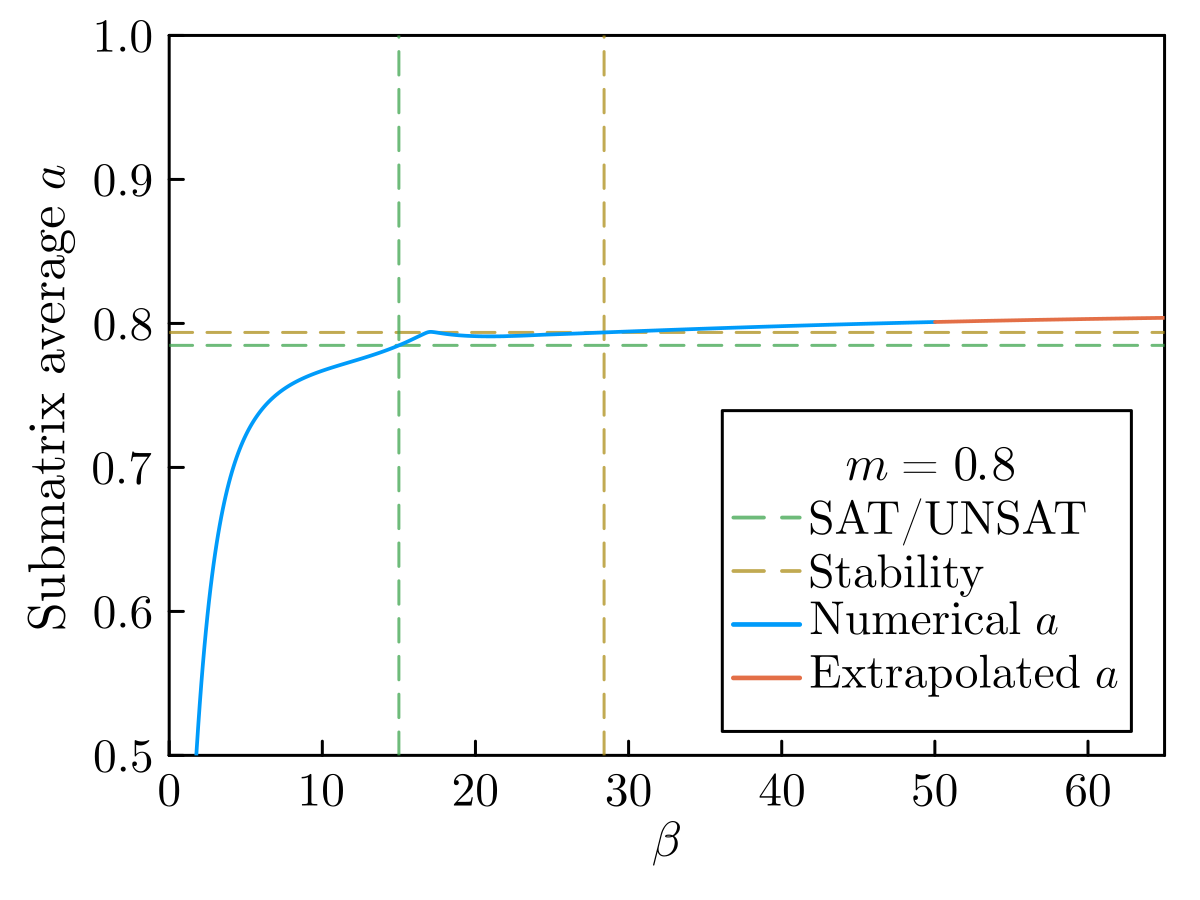

In [75]:
thresholds_finite_m = []
begin

   m_beta_limits = Dict([
      0.1 => 25, 
      0.2 => 25, 
      0.3 => 20, 
      0.4 => 25, 
      0.5 => 20, 
      0.6 => 18,
      0.8 => 50 
      ])

      
      
   m = 0.8

   data = CSV.read("data_processed.csv", DataFrame)
   df = data[data.m .== m .&& data.beta  .<= m_beta_limits[m], :]
   bs = df.beta
   maxb = max(bs...)
   minb = min(bs...)
   start_fit = min(20, length(bs)-1)
   # fitted_bs = bs[end-start_fit]:maxb/15:(10*maxb)
   fitted_bs = (bs[end]+0.01):maxb/15:(3*maxb)
   inversebs = reshape(1 ./ bs[end-start_fit:end] , (length(bs[end-start_fit:end]), 1))

   #### submatrix average
   fit_average = linregress(inversebs, df.average[end-start_fit:end], intercept = true)
   fitted_average = coef(fit_average)[1] ./ fitted_bs .+ coef(fit_average)[2]

   #### entropy 
   fit_entropy = linregress(inversebs, df.entropy[end-start_fit:end], intercept = true)
   fitted_entropy = coef(fit_entropy)[1] ./ fitted_bs .+ coef(fit_entropy)[2]

   #### replicon
   fit_replicon = linregress(inversebs, df.replicon[end-start_fit:end], intercept = true)
   fitted_replicon = coef(fit_replicon)[1] ./ fitted_bs .+ coef(fit_replicon)[2]

   ### thresholds 

   # sat 
   i_sat = findfirst(x -> x<0, vcat(df.entropy, fitted_entropy)) 
   b_sat = vcat(bs, fitted_bs)[i_sat]
   a_sat = vcat(df.average, fitted_average)[i_sat]

   # stability 
   i_stab = findfirst(x -> x<0, vcat(df.replicon, fitted_replicon) )
   b_stab = vcat(bs, fitted_bs)[i_stab]
   a_stab = vcat(df.average, fitted_average)[i_stab]

   p = plot(size = (400,300), dpi = 300, xlabel = L"$\beta$", ylabel = L"Submatrix average $a$", legend = :bottomright, ylim = (0.5, 1), xlim = (0,65),
      legend_title = L"$m = 0.8$")
      
   hline!([a_sat], label = :none, color = 3, lw = 1., ls = :dash, alpha = 0.75)
   hline!([a_stab], label = :none, color = 5, lw = 1., ls = :dash, alpha = 0.75)

   vline!([b_sat], label = "SAT/UNSAT" , color = 3, lw = 1., ls = :dash, alpha = 0.75)
   vline!([b_stab], label = "Stability" , color = 5, lw = 1., ls = :dash, alpha = 0.75)


   plot!(p, bs , df.average ,            lw = 1.25, label = L"Numerical $a$", color = 1)
   plot!(p, fitted_bs , fitted_average , lw = 1.25, label = L"Extrapolated $a$", color = 2)


   savefig(p, "plots_paper/slice_mlarge.png")
   display(p)

end